### Import Libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


### Import Data

In [6]:
# path = 'https://www.kaggle.com/datasets/amirhosseinmirzaie/americancitizenincome'
path = 'https://raw.githubusercontent.com/dataprofessor/data/master/delaney_solubility_with_descriptors.csv'
df = pd.read_csv(path)
df

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
0,2.59540,167.850,0.0,0.000000,-2.180
1,2.37650,133.405,0.0,0.000000,-2.000
2,2.59380,167.850,1.0,0.000000,-1.740
3,2.02890,133.405,1.0,0.000000,-1.480
4,2.91890,187.375,1.0,0.000000,-3.040
...,...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000,1.144
1140,3.42130,286.114,2.0,0.333333,-4.925
1141,3.60960,308.333,4.0,0.695652,-3.893
1142,2.56214,354.815,3.0,0.521739,-3.790


### Data Preparation ###

In [7]:
y = df['logS']

In [8]:
x = df.drop('logS', axis=1)

### Data splitting

In [90]:
from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)

In [52]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 915 entries, 107 to 792
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MolLogP             915 non-null    float64
 1   MolWt               915 non-null    float64
 2   NumRotatableBonds   915 non-null    float64
 3   AromaticProportion  915 non-null    float64
dtypes: float64(4)
memory usage: 35.7 KB


In [11]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 229 entries, 822 to 948
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MolLogP             229 non-null    float64
 1   MolWt               229 non-null    float64
 2   NumRotatableBonds   229 non-null    float64
 3   AromaticProportion  229 non-null    float64
dtypes: float64(4)
memory usage: 8.9 KB


In [12]:
y_train.info()

<class 'pandas.core.series.Series'>
Int64Index: 915 entries, 107 to 792
Series name: logS
Non-Null Count  Dtype  
--------------  -----  
915 non-null    float64
dtypes: float64(1)
memory usage: 14.3 KB


In [13]:
y_test.info()

<class 'pandas.core.series.Series'>
Int64Index: 229 entries, 822 to 948
Series name: logS
Non-Null Count  Dtype  
--------------  -----  
229 non-null    float64
dtypes: float64(1)
memory usage: 3.6 KB


### Model Building ### 

#### Linear Regression ####

In [139]:
from sklearn.linear_model import LinearRegression 
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

#### Applying the model to make a prediction ####

In [140]:
y_lr_train_pred = lr.predict(x_train)
y_lr_test_pred = lr.predict(x_test)

In [141]:
y_lr_train_pred

array([-2.83668969,  0.84208401, -0.50930302, -0.13058053, -1.6269208 ,
       -2.86103037, -2.32208333, -4.16684323, -5.04235077, -2.29737009,
       -3.15082845, -4.33037208, -1.43700682, -2.59060064, -7.09025955,
       -2.32734557, -4.19073421, -2.63904005, -3.58104074, -3.75929058,
       -2.5501665 , -3.26968347, -2.78911367, -2.69251051, -0.77437547,
       -6.61955792, -2.99084623, -2.36975061, -7.18167736, -1.52816491,
       -4.81736265, -0.86996608, -7.09025955, -1.87404275, -2.58013247,
       -4.80953284, -4.17454084, -1.95444152, -3.50503339, -2.7411418 ,
       -1.87131835, -2.45270806, -3.07252433, -1.48988982, -3.98778754,
       -1.35216679, -0.16932277, -6.05237002, -3.29550658,  0.30513174,
       -3.25501463, -5.31993586, -0.4733928 , -4.79180882, -5.82486323,
       -2.70343539, -3.70838271, -2.4987341 , -2.12301018, -3.11393974,
       -2.79842053, -1.38274662, -4.3267103 , -3.57778946, -3.42356884,
       -9.15826626, -6.52588866, -1.75832085, -4.97842312, -1.59

In [142]:
y_lr_test_pred

array([ -869.60716266, -1823.10208137,  -732.74529828,  -602.51560742,
        -546.03425853,  -680.73643456,  -292.75112787, -1440.6116466 ,
       -1301.24605256, -1172.60137655,  -850.01672099,  -576.21793667,
        -293.86765875,  -515.4650483 , -1666.97951476,  -701.66109042,
        -549.64114263, -1217.2838635 , -1489.12939289, -1738.47468454,
        -863.60808925, -1127.29966707, -1285.04375995,  -435.63969617,
       -1384.72101807, -1588.57026444,  -688.41410798, -1354.29881129,
       -1436.55439026,  -301.5397767 , -1819.6116268 , -2190.07106124,
        -918.88566636,  -495.2265807 ,  -619.85414028,  -354.46722412,
       -1158.30395127, -1242.13303495, -2004.91322771,  -616.06160362,
        -550.47388615,  -686.88016706, -1870.23039135, -2752.12338211,
       -1462.24613588, -1480.78204879, -1826.72907494,  -904.79015013,
       -1278.93047814,  -616.87493835,  -586.39918018, -1588.57026444,
        -462.39933001, -1309.84282459, -1546.9126325 ,  -762.39135632,
      

In [143]:
lr.coef_

array([-7.38928580e-01, -5.03669264e+00, -2.62956559e-03, -4.42898703e-01])

In [144]:
lr.intercept_

0.22249452399664005

## Gradient Descent Implementation 

### Convert to Numpy Array

In [92]:
x_train_n = x_train.to_numpy(dtype=float)
y_train_n = y_train.to_numpy(dtype=float)
x_test_n = x_test.to_numpy(dtype=float)
y_test_n = y_test.to_numpy(dtype=float)

In [103]:
x_train_n[:, 1][3]/x.max()[1]

0.19735603733406404

In [106]:
x_train_n[:, 1].size

915

### Feature Scaling 

In [107]:
def scale_feature(x_array, x_df, column_index):
    max_value = x_df.max()[column_index]
    
    for i in range(x_array[:, column_index].size):
        x_array[i, column_index] = x_array[i, column_index]/max_value
    return x_array

In [108]:
x_train

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
107,3.14280,112.216,5.0,0.000000
378,-2.07850,142.070,0.0,0.000000
529,-0.47730,168.152,0.0,0.000000
546,-0.86740,154.125,0.0,0.000000
320,1.62150,100.161,2.0,0.000000
...,...,...,...,...
802,3.00254,250.301,1.0,0.842105
53,2.13860,82.146,3.0,0.000000
350,5.76304,256.348,0.0,0.900000
79,3.89960,186.339,10.0,0.000000


In [109]:
x_train_n

array([[ 3.14280e+00,  1.12216e+02,  5.00000e+00,  0.00000e+00],
       [-2.07850e+00,  1.42070e+02,  0.00000e+00,  0.00000e+00],
       [-4.77300e-01,  1.68152e+02,  0.00000e+00,  0.00000e+00],
       ...,
       [ 5.76304e+00,  2.56348e+02,  0.00000e+00,  9.00000e-01],
       [ 3.89960e+00,  1.86339e+02,  1.00000e+01,  0.00000e+00],
       [ 2.52334e+00,  3.10297e+02,  3.00000e+00,  3.00000e-01]])

In [110]:
scale_feature(x_train_n, x, 1)

array([[ 3.1428    ,  0.14369184,  5.        ,  0.        ],
       [-2.0785    ,  0.18191969,  0.        ,  0.        ],
       [-0.4773    ,  0.21531752,  0.        ,  0.        ],
       ...,
       [ 5.76304   ,  0.32825191,  0.        ,  0.9       ],
       [ 3.8996    ,  0.23860585, 10.        ,  0.        ],
       [ 2.52334   ,  0.39733324,  3.        ,  0.3       ]])

In [111]:
x_train_n

array([[ 3.1428    ,  0.14369184,  5.        ,  0.        ],
       [-2.0785    ,  0.18191969,  0.        ,  0.        ],
       [-0.4773    ,  0.21531752,  0.        ,  0.        ],
       ...,
       [ 5.76304   ,  0.32825191,  0.        ,  0.9       ],
       [ 3.8996    ,  0.23860585, 10.        ,  0.        ],
       [ 2.52334   ,  0.39733324,  3.        ,  0.3       ]])

In [112]:
def gradient_descent_without_scikit(y_train_n, w_init, b_init, x_train_n, iterations, a):
     
    m = x_train_n.shape[0]
    dj_db_history = np.zeros(iterations, dtype=float)
    dj_dw_history = np.zeros((iterations, w_init.size), dtype=float)
    j_history = np.zeros(iterations, dtype=float)
    y_pred_history = np.zeros((iterations,m), dtype=float) 
    w = w_init
    b = b_init 
    
    y_pred = compute_y_pred(w, x_train_n, b)  
    for i in range(iterations): 
        dj_db, dj_dw = compute_gradient_1(y_pred, y_train_n, x_train_n)
        j_history[i] = compute_cost(y_pred, y_train_n)
        dj_db_history[i] = dj_db
        dj_dw_history[i] = dj_dw 
        b = b - a * dj_db 
        w = w - a * dj_dw
        y_pred = compute_y_pred(w, x_train_n, b)
        y_pred_history[i,:] = y_pred 
        
    return w, b, dj_dw_history, dj_db_history, j_history, y_pred_history  

In [113]:
def compute_gradient_1(y_pred, y_train_n, x_train_n):
    m=y_pred.size
    n=x_train_n.shape[1]
    dj_dw = np.zeros(x_train_n.shape, dtype=float)
    dj_db = np.zeros(m, dtype=float)
    for i in range(m):
        dj_db[i]=(y_pred[i]-y_train_n[i])
        for j in range(n): 
            dj_dw[i, j] = ((y_pred[i] - y_train_n[i]) * x_train_n[i, j])
    
    w_cost =np.zeros(n, dtype=float)
    for i in range(n):
        w_cost[i]=np.sum(dj_dw[:, i])
        
    w_cost = w_cost / m 
    b_cost = np.sum(dj_db)/m
    return b_cost, w_cost

In [47]:
# def compute_gradient(y_pred, y_train, x_train):
#     
#     #Convert the pandas Dataframes to numpy Arrays to allow for easier manipulation. Indexing not possible in DF.  
# #     y_pred : numpy array
#     y_train_n = y_train.to_numpy(dtype=float)
#     x_train_n = x_train.to_numpy(dtype=float) 
#     
#     m=y_pred.size
#     n=x_train_n.shape[1]
#     dj_dw = np.zeros((x_train.shape), dtype=float)
#     dj_db = np.zeros(m, dtype=float)
#     for i in range(m):
#         dj_db[i]=(y_pred[i]-y_train_n[i])
#         for j in range(n): 
#             dj_dw[i, j] = ((y_pred[i] - y_train_n[i]) * x_train_n[i, j])
#     
#     w_cost =np.zeros(n, dtype=float)
#     for i in range(n):
#         w_cost[i]=np.sum(dj_dw[:, i])
# 
#     w_cost = w_cost / m
#     b_cost = np.sum(dj_db)/m
#     return b_cost, w_cost

In [138]:
def compute_cost(y_predicted, y_actual):
    # both numpy arrays 
    sum_array = np.zeros(y_predicted.size, dtype=float)
    for i in range(y_predicted.size):
        sum_array[i] = (y_predicted[i]-y_actual[i])**2
    cost = np.sum(sum_array)/(2*m)
    return cost

In [115]:
def compute_y_pred(w, x, b): 
    m = x.shape[0]
    y_pred = np.zeros(m)
    for i in range(m):
        y_pred[i] = np.dot(w, x[i])+b
    return y_pred

### Calculate Gradient Descent ###

In [123]:
y_lr_train_pred

array([-2.11388478e+00,  1.75718430e+00,  5.73796456e-01,  8.62168336e-01,
       -9.81764478e-01, -1.89976606e+00, -1.68962903e+00, -2.04014812e+00,
       -3.60530774e+00, -1.56246862e+00, -2.02361969e+00, -2.58248996e+00,
        5.56729194e-01, -1.58404186e+00, -4.98761585e+00, -1.61764849e+00,
       -2.36848208e+00, -1.86208403e+00, -1.49192999e+00, -2.35911694e+00,
       -1.61515649e+00, -2.32280235e+00, -1.91832235e+00, -1.02859578e+00,
       -2.06867728e-01, -3.98007299e+00, -2.06220012e+00, -1.40243158e+00,
       -4.66597928e+00, -8.31588540e-01, -2.73600065e+00, -4.69729677e-01,
       -4.98761585e+00, -8.94021682e-01, -1.15495411e+00, -2.82319132e+00,
       -2.63333084e+00, -4.58545315e-01, -1.95776223e+00, -1.19075954e+00,
       -1.34220011e+00, -1.82025377e+00, -1.32444897e+00, -8.31748048e-01,
       -1.75612674e+00, -7.39602904e-01,  4.33012507e-01, -3.36907853e+00,
       -1.64459662e+00,  5.11520445e-01, -1.21684727e+00, -2.78304625e+00,
        1.01282309e-02, -

In [130]:
m = x_train_n.shape[0]
n = x_train_n.shape[1]
w = np.zeros(n, dtype=float)
# w = np.array([.55, 6.6, 7.8, 8.0])
b = 0.0
iterations = 1500
learning_rate = .0001

w, b, dj_dw_history, dj_db_history, j_history, y_pred_history = gradient_descent_without_scikit(y_train_n, w, b, x_train_n, iterations, learning_rate)

convergence_point = j_history[iterations-1]
gradient_w = dj_dw_history[iterations-1]
gradient_b = dj_db_history[iterations-1]
print(f"the last gradients  are {gradient_w} and {gradient_b}. They should decrease by {learning_rate}")
print(f"lowest cost using gradient descent is {convergence_point}")

expected = compute_cost(y_lr_train_pred, y_train_n)
print(f"the expected cost using scikit LR is {expected}")

the last gradients  are [ 1.68105012  0.18011283 -0.40643864  0.3323695 ] and 0.49747055175694943. They should decrease by 0.0001
lowest cost using gradient descent is 1.0231998133968028
the expected cost using scikit LR is 1.5786095711097259


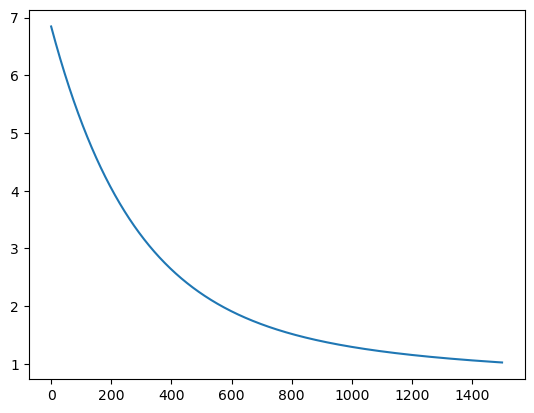

In [131]:
plt.plot(j_history)

In [132]:
w

array([-0.6729862 , -0.06314108, -0.3056014 , -0.09587658])

In [133]:
b

-0.19281997518806732

### Finding cost of Sci Kit's LR ###

In [134]:
lr.coef_

array([-0.73892858, -0.00644945, -0.00262957, -0.4428987 ])

In [135]:
lr.intercept_

0.22249452399664316

In [147]:
compute_cost(y_lr_test_pred, y_test_n)

173288.89468003938

In [148]:
y_test_prediction_gradient_descent = compute_y_pred(w, x_test_n, b)
compute_cost(y_test_prediction_gradient_descent, y_test_n)

24.892581797437444

#### Evaluate model performance ####

In [68]:
from sklearn.metrics import mean_squared_error, r2_score

lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
lr_train_r2 = r2_score(y_train, y_lr_train_pred) 

lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred) 

In [69]:
print('LR MSE TRAIN: ', lr_train_mse) 
print('LR R2 TRAIN: ', lr_train_r2)
print('LR MSE TEST: ', lr_test_mse)
print('LR R2 TEST: ', lr_test_r2)

LR MSE TRAIN:  1.007536295109369
LR R2 TRAIN:  0.7645051774663391
LR MSE TEST:  1.0206953660861033
LR R2 TEST:  0.7891616188563282


In [70]:
lr_results = pd.DataFrame(['Linear Regression', lr_train_mse, lr_train_r2, lr_test_mse, lr_test_r2]).transpose()
lr_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']
lr_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear Regression,1.007536,0.764505,1.020695,0.789162


## Random Forest ##

### Training the Model ###

In [71]:
from sklearn.ensemble import RandomForestRegressor 

rf = RandomForestRegressor(max_depth=2, random_state=100)
rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=2, random_state=100)

### Applying Model to make a prediction ###

In [72]:
y_rf_train_pred = rf.predict(x_train)
y_rf_test_pred = rf.predict(x_test)

### Evaluate model performance ###

In [73]:
from sklearn.metrics import mean_squared_error, r2_score

rf_train_mse = mean_squared_error(y_train, y_rf_train_pred)
rf_train_r2 = r2_score(y_train, y_rf_train_pred) 

rf_test_mse = mean_squared_error(y_test, y_rf_test_pred)
rf_test_r2 = r2_score(y_test, y_rf_test_pred) 

rf_results = pd.DataFrame(['Random Forest', rf_train_mse, rf_train_r2, rf_test_mse, rf_test_r2]).transpose()
rf_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']
rf_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Random Forest,1.028228,0.759669,1.407688,0.709223


In [74]:
df_models = pd.concat([lr_results, rf_results], axis=0)
df_models

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear Regression,1.007536,0.764505,1.020695,0.789162
0,Random Forest,1.028228,0.759669,1.407688,0.709223


## Data Visualization of prediction results ##

Text(0.5, 0, 'Experimental LogS')

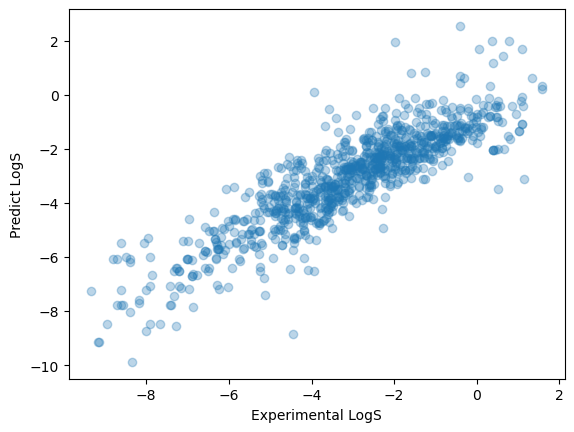

In [75]:
import matplotlib.pyplot as plt

plt.scatter(x=y_train, y=y_lr_train_pred, alpha=0.3)
z = np.polyfit(y_train, y_lr_train_pred, 1)
p = np.poly1d(z)

plt.plot()
plt.ylabel('Predict LogS')
plt.xlabel('Experimental LogS')